In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from operator import attrgetter

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans
from time import time

In [79]:
wc = pd.read_csv('wc.csv')
wc.head(5)

,STP,Consumer_no,event_time
0,606145,C00024586,2024-03-31 23:59:38
1,606145,C00001504,2024-03-31 23:39:33
2,606145,C00009112,2024-03-31 23:31:07
3,606145,C00005129,2024-03-31 23:29:20
4,606145,C00006094,2024-03-31 23:10:54


In [80]:
wc.dtypes

STP             int64
Consumer_no    object
event_time     object
dtype: object

In [81]:
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        stp = pd.read_csv('STP.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue
stp.head(5)

,STP,STP Name,H Sales Region,H Sales District,H Sales Area,Local Sub Channel,Local Micro Sub Chan
0,301806,MARHAVI EATING HOUSE,INLAND,INL - GREAT NORTH,THOHOYANDOU,MAINSTREAM TAVERN,CLASSIC TAVERN
1,301854,TOPS 2 ENGCOBO,EAST COAST,ECR - KEI,KEI BTW,SELF SERVICE,SS SPECIALITY LIQUOR
2,302529,FIVE STAR LIQUOR RESTAURANT,INLAND,INL - ODI,ODI NORTH TEAM,MAINSTREAM BAR,LOCAL HANGOUT
3,303001,WIJO'S CORNER,INLAND,INL - ISANDO,ISANDO MAIN,WHOLESALER,WS COUNTER SERVICE
4,303106,BLUE BOTTLE PAARL MALL,CAPE,CAP - CAPE WINELANDS,DCW BELV NORTH,SELF SERVICE,SS SPECIALITY LIQUOR


In [82]:
wifi_data = pd.concat([stp, wc], axis=0)

## Explorary Data Analysis

In [83]:
#Columns of the merged files
wifi_data.columns

Index(['STP', 'STP Name', 'H Sales Region', 'H Sales District', 'H Sales Area',
       'Local Sub Channel', 'Local Micro Sub Chan', 'Consumer_no',
       'event_time'],
      dtype='object')

In [84]:
# If there are leading/trailing spaces in column names, strip them
wifi_data.columns = wifi_data.columns.str.strip()

In [85]:
wifi_data = wifi_data.rename(columns={'H Sales Region': 'Sales_Region', 
                                      'H Sales District': 'Sales_District', 
                                      'H Sales Area': 'Sales_Area'})

In [86]:
wifi_data.shape

(3687188, 9)

We have 9 columns and 3687188 rows

In [87]:
#Datatypes of the merged files
wifi_data.dtypes

STP                      int64
STP Name                object
Sales_Region            object
Sales_District          object
Sales_Area              object
Local Sub Channel       object
Local Micro Sub Chan    object
Consumer_no             object
event_time              object
dtype: object

In [88]:
#Unique values of the merged files
wifi_data.nunique()

STP                       56511
STP Name                  51494
Sales_Region                  6
Sales_District               28
Sales_Area                  131
Local Sub Channel            17
Local Micro Sub Chan         44
Consumer_no              375076
event_time              3341331
dtype: int64

In [89]:
#Total missing values of the merged files
wifi_data.isnull().sum()

STP                           0
STP Name                3630677
Sales_Region            3630677
Sales_District          3630677
Sales_Area              3630677
Local Sub Channel       3630677
Local Micro Sub Chan    3630677
Consumer_no               56511
event_time                56511
dtype: int64

Total number of null values on the remaining columns.

In [90]:
#Discriptive values of the merged files
wifi_data.describe().T

,count,mean,std,min,25%,50%,75%,max
STP,3687188.0,606893.669167,100907.119519,301806.0,561754.0,627896.0,655709.0,9242551.0


### Data Visualization

###### Exploring Sales Region

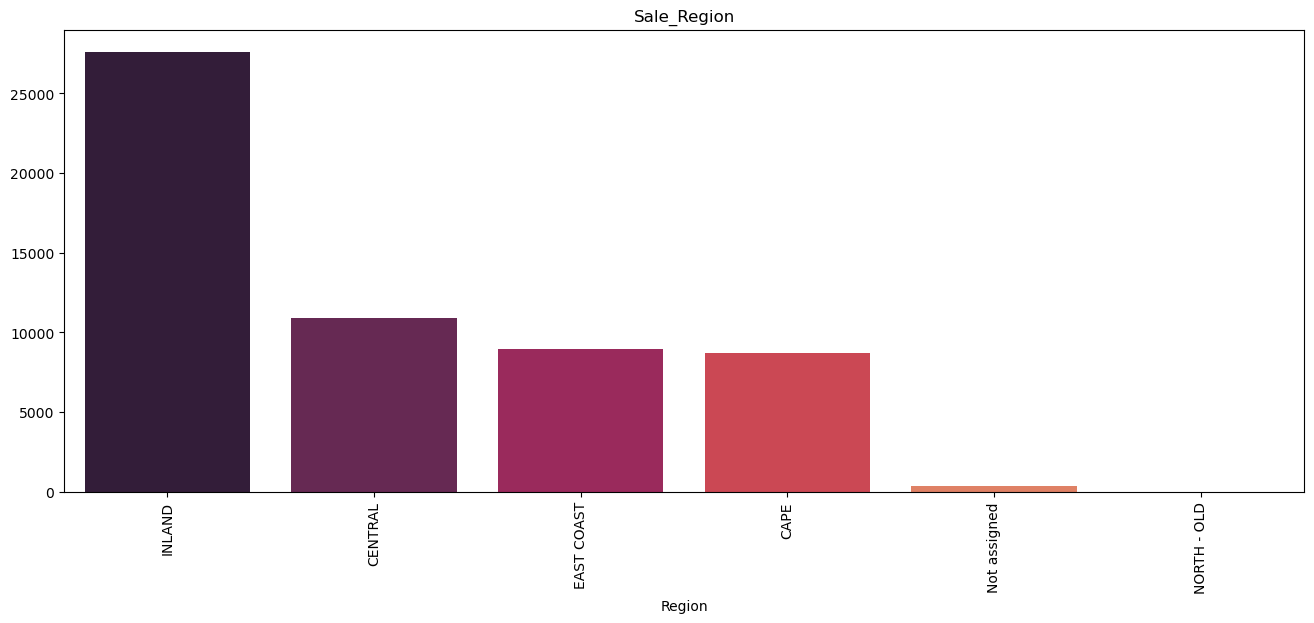

In [91]:
# Sales Region
plt.figure(figsize=(16, 6))
data = wifi_data['Sales_Region'].value_counts()[:10]
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('Sale_Region')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()

In [92]:
wifi_data['Sales_Region'].value_counts()

INLAND          27620
CENTRAL         10877
EAST COAST       8935
CAPE             8724
Not assigned      342
NORTH - OLD        13
Name: Sales_Region, dtype: int64

Findings (The findings are based on the top Sales Region)

* INLAND is the Region with the highest wifi interactions
* NORTH - OLD is the lowest with 13

##### Exploring District

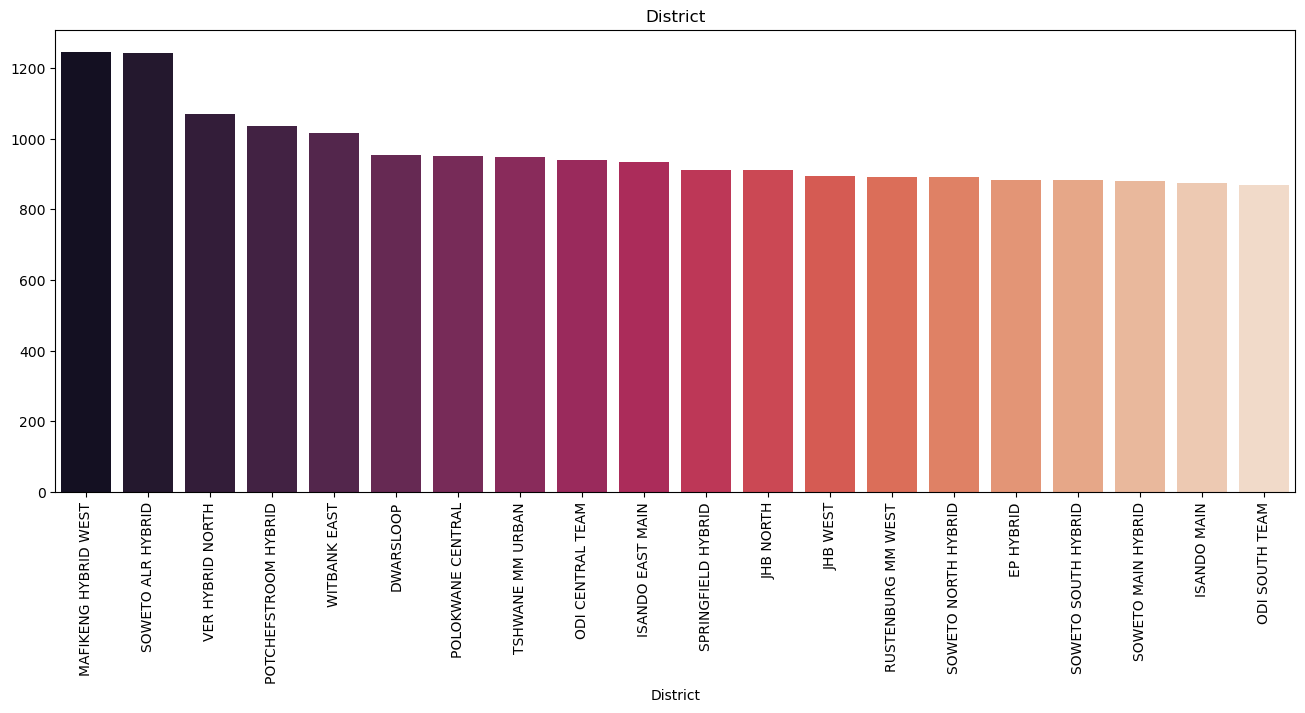

In [93]:
# Leading District
plt.figure(figsize=(16, 6))
data = wifi_data['Sales_Area'].value_counts()[:20]
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('District')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.show()

In [94]:
wifi_data['Sales_District'].value_counts()

INL - SOWETO            4725
INL - LIMPOPO           3296
INL - JHB               3194
INL - ISANDO            3172
CEN - NORTH WEST        3081
INL - MPUMALANGA        3079
ECR - NORTH COAST       2946
INL - TSHWANE           2898
CEN - VAAL MALUTI       2765
INL - ODI               2622
CAP - EASTERN PROVIN    2585
INL - LOWVELD           2455
CAP - BORDER            2416
CEN - HIGHVELD          2409
CAP - CAPE WINELANDS    1976
INL - GREAT NORTH       1901
ECR - HEARTLAND         1799
CAP - CAPE PENINSULA    1745
ECR - SOUTH COAST       1619
CEN - CENTRAL SOUTH     1488
ECR - KEI               1372
ECR - MIDLANDS          1199
CEN - NORTHERN CAPE     1134
Not assigned             342
INL - EXPORTS            287
INL - EAST                 3
CAP - OBSOLETE             2
INL - WEST                 1
Name: Sales_District, dtype: int64

Findings based on the Sales District:

    * INL - SOWETO is the district with the highest wifi interaction with a total of 4725
    * IN - West is the district with the lowest with only one person interacting with the wifi

###### Exploring Sales Area

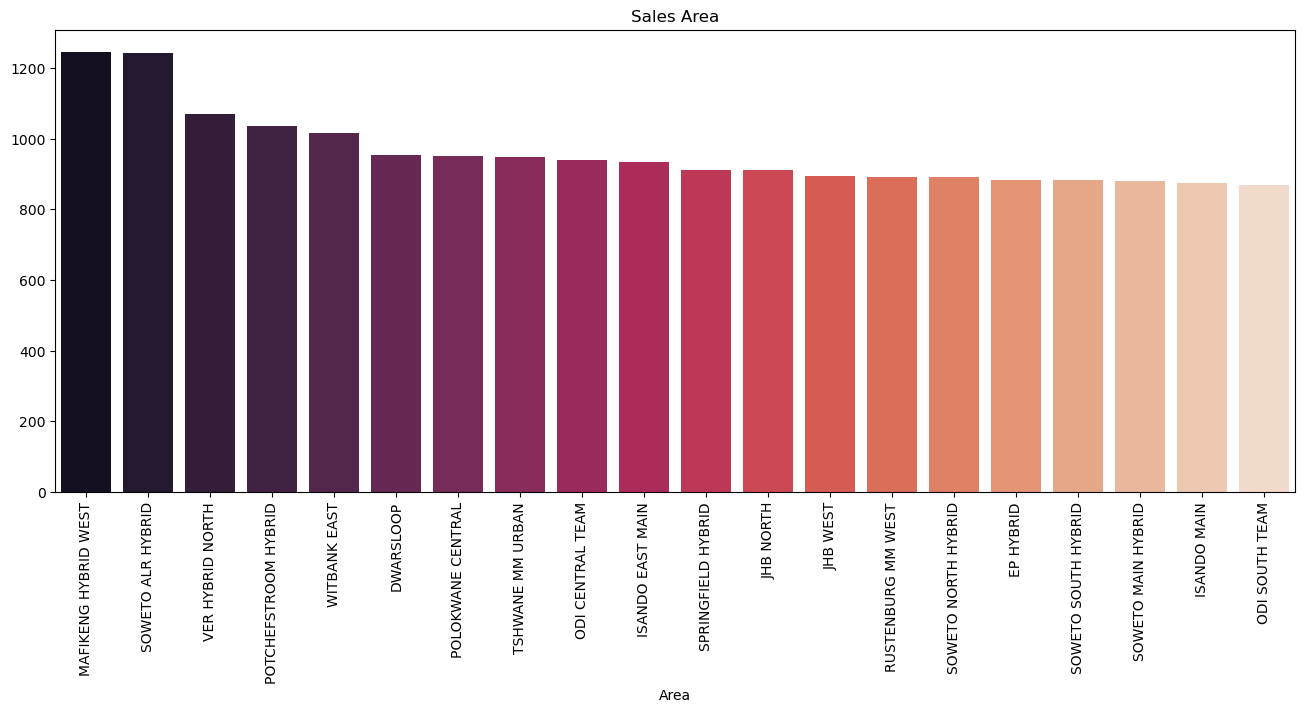

In [95]:
# Leading Sales Area
plt.figure(figsize=(16, 6))
data = wifi_data['Sales_Area'].value_counts()[:20]
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('Sales Area')
plt.xlabel('Area')
plt.xticks(rotation=90)
plt.show()

In [96]:
wifi_data['Sales_Area'].value_counts()[:20]

MAFIKENG HYBRID WEST    1246
SOWETO ALR HYBRID       1243
VER HYBRID NORTH        1071
POTCHEFSTROOM HYBRID    1035
WITBANK EAST            1015
DWARSLOOP                955
POLOKWANE CENTRAL        950
TSHWANE MM URBAN         948
ODI CENTRAL TEAM         941
ISANDO EAST MAIN         935
SPRINGFIELD HYBRID       911
JHB NORTH                910
JHB WEST                 895
RUSTENBURG MM WEST       892
SOWETO NORTH HYBRID      891
EP HYBRID                883
SOWETO SOUTH HYBRID      882
SOWETO MAIN HYBRID       879
ISANDO MAIN              874
ODI SOUTH TEAM           869
Name: Sales_Area, dtype: int64

##### Exploring Local Sub Channel

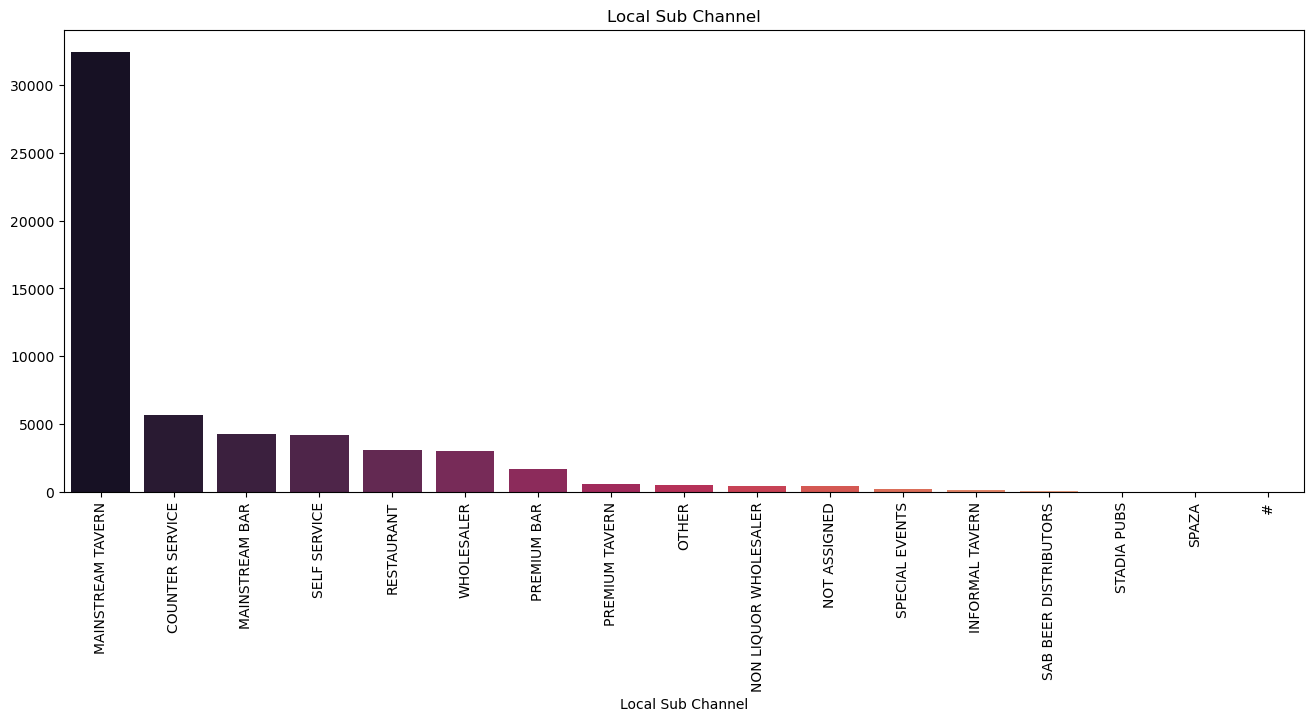

In [97]:
# Leading Local Sub Channel
plt.figure(figsize=(16, 6))
data = wifi_data['Local Sub Channel'].value_counts()
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('Local Sub Channel')
plt.xlabel('Local Sub Channel')
plt.xticks(rotation=90)
plt.show()

In [98]:
wifi_data['Local Sub Channel'].value_counts()

MAINSTREAM TAVERN        32466
COUNTER SERVICE           5668
MAINSTREAM BAR            4263
SELF SERVICE              4171
RESTAURANT                3105
WHOLESALER                2990
PREMIUM BAR               1654
PREMIUM TAVERN             584
OTHER                      470
NON LIQUOR WHOLESALER      426
NOT ASSIGNED               388
SPECIAL EVENTS             192
INFORMAL TAVERN            107
SAB BEER DISTRIBUTORS       11
STADIA PUBS                  7
SPAZA                        7
#                            2
Name: Local Sub Channel, dtype: int64

###### Exploring Local Micro Sub Chan

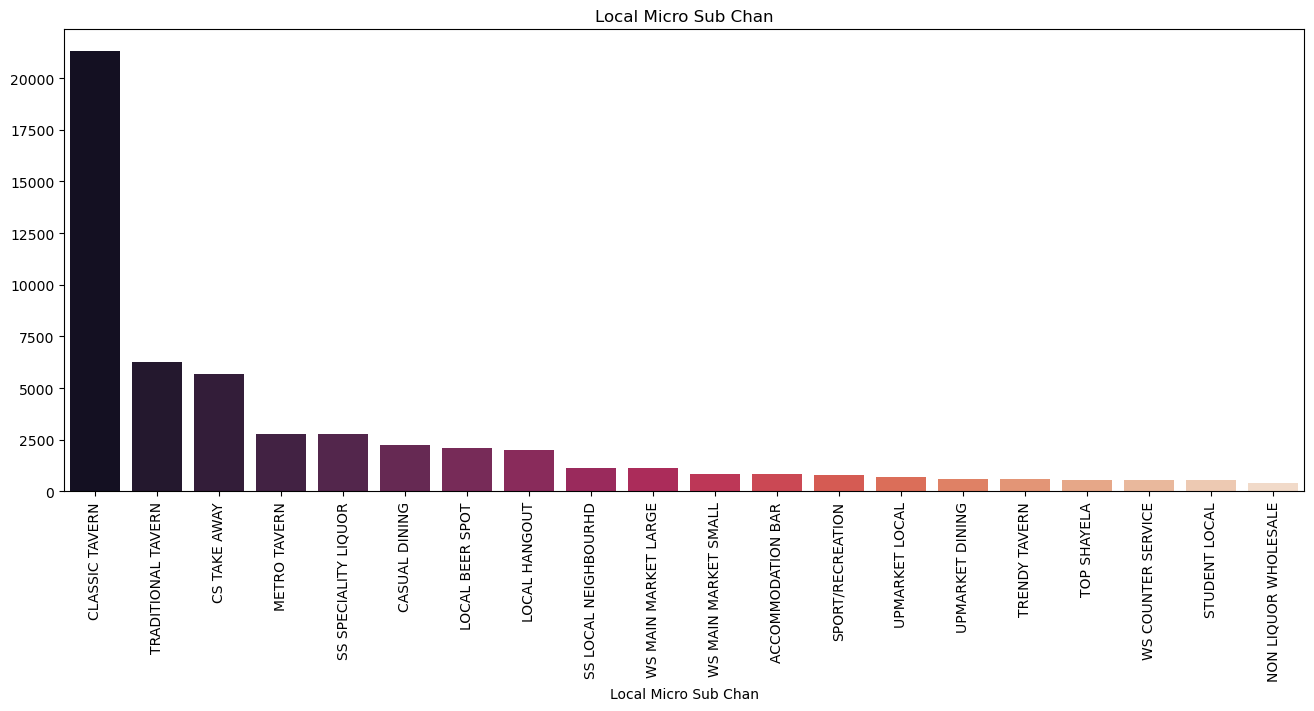

In [99]:
# Leading Local Sub Chan
plt.figure(figsize=(16, 6))
data = wifi_data['Local Micro Sub Chan'].value_counts()[:20]
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('Local Micro Sub Chan')
plt.xlabel('Local Micro Sub Chan')
plt.xticks(rotation=90)
plt.show()

In [100]:
wifi_data['Local Micro Sub Chan'].value_counts()[:20]

CLASSIC TAVERN          21298
TRADITIONAL TAVERN       6259
CS TAKE AWAY             5656
METRO TAVERN             2771
SS SPECIALITY LIQUOR     2756
CASUAL DINING            2257
LOCAL BEER SPOT          2108
LOCAL HANGOUT            2010
SS LOCAL NEIGHBOURHD     1134
WS MAIN MARKET LARGE     1115
WS MAIN MARKET SMALL      862
ACCOMMODATION BAR         816
SPORT/RECREATION          779
UPMARKET LOCAL            691
UPMARKET DINING           605
TRENDY TAVERN             584
TOP SHAYELA               564
WS COUNTER SERVICE        539
STUDENT LOCAL             527
NON LIQUOR WHOLESALE      426
Name: Local Micro Sub Chan, dtype: int64

##### Exploring STPs

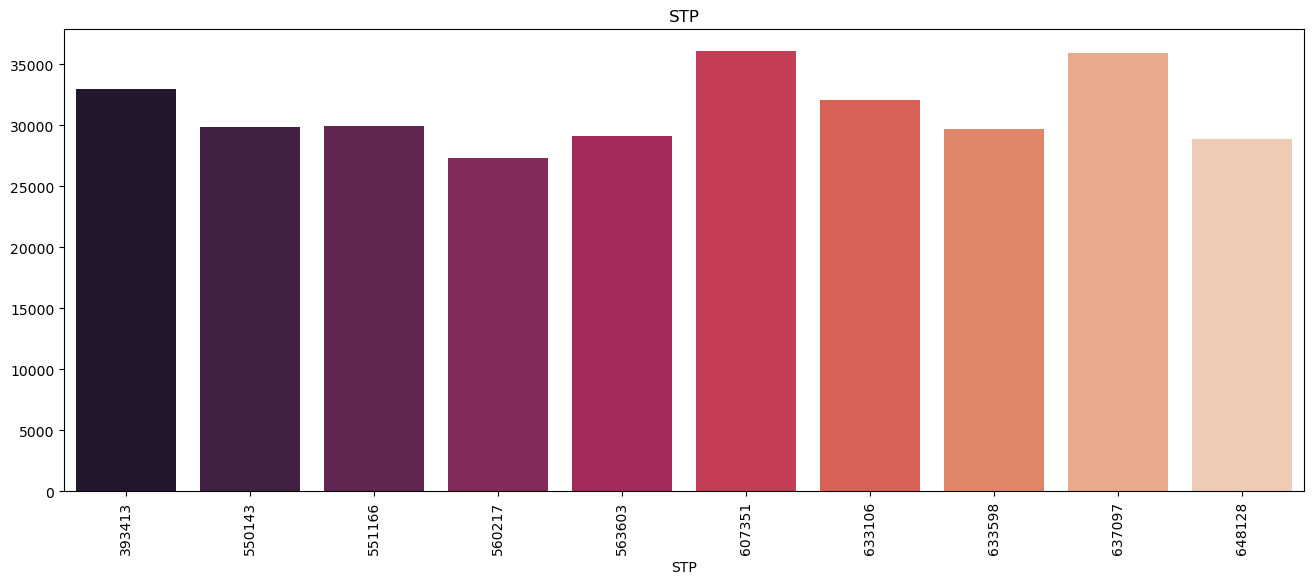

In [101]:
plt.figure(figsize=(16, 6))
data = wifi_data['STP'].value_counts().nlargest(10)
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('STP')
plt.xlabel('STP')
plt.xticks(rotation=90)
plt.show()

In [102]:
wifi_data['STP'].value_counts()

607351     36041
637097     35933
393413     33000
633106     32037
551166     29939
           ...  
565533         1
565536         1
565537         1
565541         1
9242551        1
Name: STP, Length: 56511, dtype: int64

In [103]:
stp_counts = wifi_data.groupby(['STP', 'STP Name']).size().reset_index(name='Count')

print(stp_counts)

           STP                           STP Name  Count
0       301806               MARHAVI EATING HOUSE      1
1       301854                     TOPS 2 ENGCOBO      1
2       302529        FIVE STAR LIQUOR RESTAURANT      1
3       303001                      WIJO'S CORNER      1
4       303106             BLUE BOTTLE PAARL MALL      1
...        ...                                ...    ...
56506   863905        IMVUSA CAPE TOWN - RED BULL      1
56507   863913  JUMPA MANAGEMENT GROUP - RED BULL      1
56508  5000000              BARAK 1000 - RED BULL      1
56509  5000010        IMVUSA CAPE TOWN - RED BULL      1
56510  9242551                   CORNELIUS WRIGHT      1

[56511 rows x 3 columns]


In [104]:
stp_mapping = {
    'STP Type 0': 0,
    'STP Type 1': 1,
    'STP Type 2': 2,
    # Add more mappings as needed
}

# Replace 'STP' values based on 'STP_Name'
wifi_data['STP'] = wifi_data['STP Name'].map(stp_mapping)

# Display the DataFrame with the updated 'STP' column
print(wifi_data[['STP', 'STP Name']])

         STP                     STP Name
0        NaN         MARHAVI EATING HOUSE
1        NaN               TOPS 2 ENGCOBO
2        NaN  FIVE STAR LIQUOR RESTAURANT
3        NaN                WIJO'S CORNER
4        NaN       BLUE BOTTLE PAARL MALL
...      ...                          ...
3630672  NaN                          NaN
3630673  NaN                          NaN
3630674  NaN                          NaN
3630675  NaN                          NaN
3630676  NaN                          NaN

[3687188 rows x 2 columns]


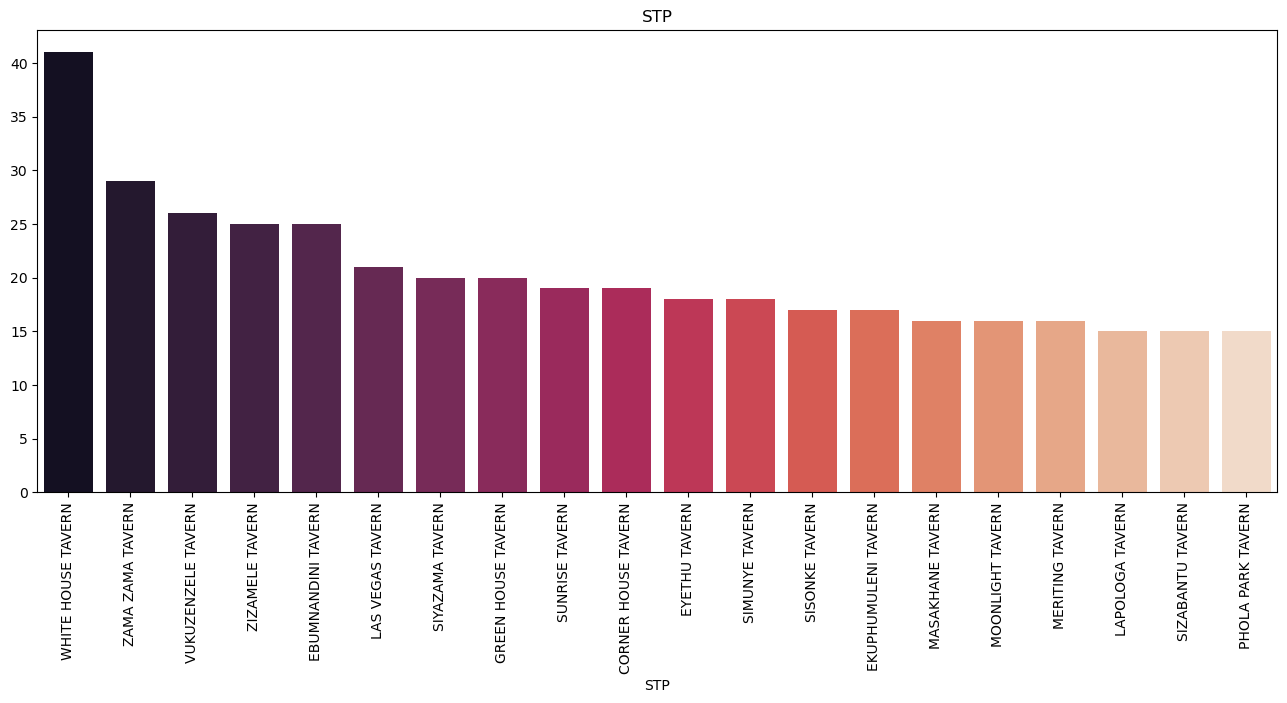

In [105]:
plt.figure(figsize=(16, 6))
data = wifi_data['STP Name'].value_counts().nlargest(20)
sns.barplot(x=data.index, y=data.values, palette='rocket')
plt.title('STP')
plt.xlabel('STP')
plt.xticks(rotation=90)
plt.show()

In [106]:
wifi_data['STP Name'].value_counts()[:20]

WHITE HOUSE TAVERN     41
ZAMA ZAMA TAVERN       29
VUKUZENZELE TAVERN     26
ZIZAMELE TAVERN        25
EBUMNANDINI TAVERN     25
LAS VEGAS TAVERN       21
SIYAZAMA TAVERN        20
GREEN HOUSE TAVERN     20
SUNRISE TAVERN         19
CORNER HOUSE TAVERN    19
EYETHU TAVERN          18
SIMUNYE TAVERN         18
SISONKE TAVERN         17
EKUPHUMULENI TAVERN    17
MASAKHANE TAVERN       16
MOONLIGHT TAVERN       16
MERITING TAVERN        16
LAPOLOGA TAVERN        15
SIZABANTU TAVERN       15
PHOLA PARK TAVERN      15
Name: STP Name, dtype: int64

In [107]:
wifi_data.columns

Index(['STP', 'STP Name', 'Sales_Region', 'Sales_District', 'Sales_Area',
       'Local Sub Channel', 'Local Micro Sub Chan', 'Consumer_no',
       'event_time'],
      dtype='object')

###### Exploring Event Time

In [108]:
wifi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687188 entries, 0 to 3630676
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STP                   float64
 1   STP Name              object 
 2   Sales_Region          object 
 3   Sales_District        object 
 4   Sales_Area            object 
 5   Local Sub Channel     object 
 6   Local Micro Sub Chan  object 
 7   Consumer_no           object 
 8   event_time            object 
dtypes: float64(1), object(8)
memory usage: 281.3+ MB


In [109]:
#Convert time to the datetime format
wifi_data['event_time'] = pd.to_datetime(wifi_data['event_time'])

In [110]:
#Check whether the event time dataframe changed
wifi_data['event_time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3687188 entries, 0 to 3630676
Series name: event_time
Non-Null Count    Dtype         
--------------    -----         
3630677 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 56.3 MB


In [111]:
#Order the weekdays
wifi_data['weekday'] = wifi_data['event_time'].dt.day_name()

In [112]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [113]:
wifi_data['weekday'] = pd.Categorical(wifi_data['weekday'] ,categories=weekdays)

In [114]:
wifi_data.head()

,STP,STP Name,Sales_Region,Sales_District,Sales_Area,Local Sub Channel,Local Micro Sub Chan,Consumer_no,event_time,weekday
0,NaN,MARHAVI EATING HOUSE,INLAND,INL - GREAT NORTH,THOHOYANDOU,MAINSTREAM TAVERN,CLASSIC TAVERN,NaN,NaT,NaN
1,NaN,TOPS 2 ENGCOBO,EAST COAST,ECR - KEI,KEI BTW,SELF SERVICE,SS SPECIALITY LIQUOR,NaN,NaT,NaN
2,NaN,FIVE STAR LIQUOR RESTAURANT,INLAND,INL - ODI,ODI NORTH TEAM,MAINSTREAM BAR,LOCAL HANGOUT,NaN,NaT,NaN
3,NaN,WIJO'S CORNER,INLAND,INL - ISANDO,ISANDO MAIN,WHOLESALER,WS COUNTER SERVICE,NaN,NaT,NaN
4,NaN,BLUE BOTTLE PAARL MALL,CAPE,CAP - CAPE WINELANDS,DCW BELV NORTH,SELF SERVICE,SS SPECIALITY LIQUOR,NaN,NaT,NaN


In [115]:
wifi_data.tail()

,STP,STP Name,Sales_Region,Sales_District,Sales_Area,Local Sub Channel,Local Micro Sub Chan,Consumer_no,event_time,weekday
3630672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C00061230,2022-05-01 17:59:33,Sunday
3630673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C00180467,2022-04-25 14:43:27,Monday
3630674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C00227788,2022-04-24 15:28:14,Sunday
3630675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C00230716,2022-04-23 11:05:16,Saturday
3630676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C00202187,2022-04-23 10:16:48,Saturday


###### Draft for time

On which seasons do people interact with the wifi?

In [116]:
# Datetime features
wifi_data['hour'] = wifi_data['event_time'].dt.hour
wifi_data['month'] = wifi_data['event_time'].dt.month

In [117]:
# Seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

wifi_data['season'] = wifi_data['month'].apply(get_season)

In [118]:
# Group by hour and season to analyze login patterns
hourly_logins = wifi_data.groupby('hour').size()
seasonal_logins = wifi_data.groupby('season').size()

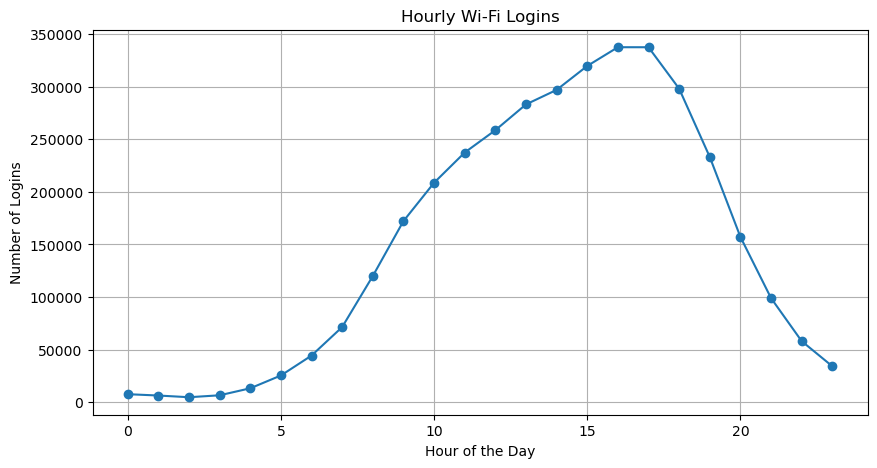

In [119]:
# Plotting hourly login patterns
plt.figure(figsize=(10, 5))
plt.plot(hourly_logins.index, hourly_logins.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.title('Hourly Wi-Fi Logins')
plt.grid(True)
plt.show()

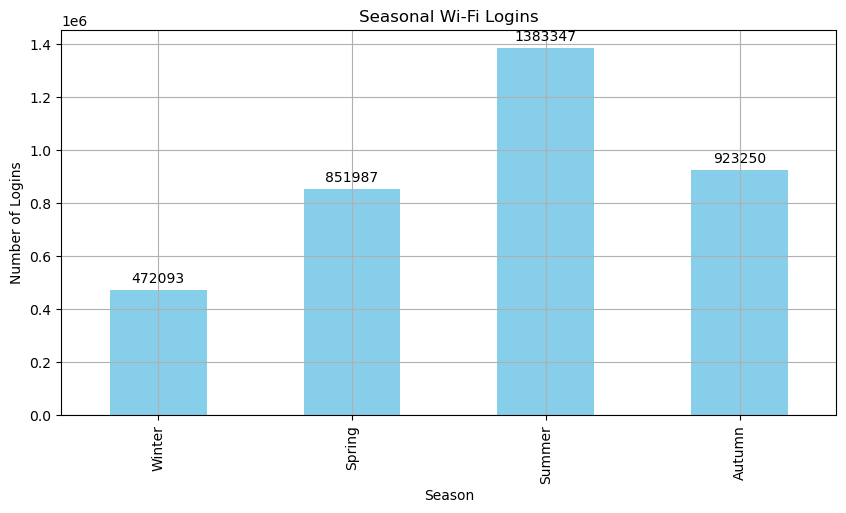

In [120]:
# Plotting seasonal login patterns
seasonal_logins = seasonal_logins.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])  # Ensure the correct order
plt.figure(figsize=(10, 5))
ax = seasonal_logins.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Logins')
plt.title('Seasonal Wi-Fi Logins')
plt.grid(True)

# Annotating the total number of interactions on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%d', padding=3)

plt.show()

###### Key Findings:

###### Hourly Wifi Login Patterns:

1. Peak Activity Hours:
    * Evening Peaks: The highest number of logins occurs in the    evening, especially between 6pm and 11pm. This aligns with the time the most people visit the tarvens after work or during social events.
    * Weekend Variations: On weekends, peak activity might extend later into the night, reflecting extended social hours.
    
2. Low Activity Periods:
        
    * Early Morning Lows: Logins are minimal during the early morning hours between 2am and 8am, this is when tarvens are typically closed or have fewer visitors.

###### Seasonal Wifi Login Patterns:

1. Summer (December to February):
    
    * High Activity: Summer sees a significant increase in Wifi logins. This is attributed to the holiday season, where people are most likely to socialise and visit tarvens. (Warmer weather encourages outings and gatherings)

2. Autumn (March to May):
    
    * Moderate Activity: As routines normalize post-holiday season. There might be a slight decline in tarven visits. 

3. Winter (June to August):
    
    * Variable Activity: Winter can see a varied level in activities. Some tarvens might experience lower traffic due to colder weather, while others could see a stable increased activities as people seek indoor entertainment.
        
4. Spring (Sepetember to November):
    
    * Increasing Activity: Spring often brings a resurgance in tarven visits. With the improving weather and the approach of the year-end, people tend to socialize more, leading to increased Wi-fi logins.

###### Insights and Recommendations:

1. Resource Optimization:
    
    * Enhanced Evening Coverage: Given the peak login times in the evenings, we can ensure that Wi-fi networks are optimized to handle higher loads during these periods. This might involve increasing badwidth or optimizing access points.

2. Seasonal Promotions:
    
    * Summer Campaigns: Leverage the high activity in summer by offering promotions, events or special deals to attract even more customers. ( Ensuring robust wi-fi conectivity can enhance the customer experience and encourage longer stays).
    * Winter engagements: During winter we can consider hosting indoor events or offering incentives to draw customers in ensuring wi-fi remains a selling point for those seeking warm places to socialize in.

###### Consumer Behavior Analysis

###### feature engineering

In [121]:
features = ['STP Name', 'Sales_Region', 'Sales_District', 'Sales_Area', 'Local Sub Channel', 'Local Micro Sub Chan']
X = wifi_data[features]


In [122]:
encoder = OneHotEncoder(sparse=True)

In [123]:
# Encode categorical variables
encoded_data = encoder.fit_transform(X)

# Convert sparse matrix to DataFrame if needed
encoded_data_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out())

# Reset index of wifi_data
wifi_data.reset_index(drop=True, inplace=True)

# Combine encoded data with original DataFrame
wifi_data_encoded = pd.concat([wifi_data.drop(columns=features), encoded_data_df], axis=1)

print(wifi_data_encoded)

         STP Consumer_no          event_time   weekday  hour  month  season  \
0        NaN         NaN                 NaT       NaN   NaN    NaN    None   
1        NaN         NaN                 NaT       NaN   NaN    NaN    None   
2        NaN         NaN                 NaT       NaN   NaN    NaN    None   
3        NaN         NaN                 NaT       NaN   NaN    NaN    None   
4        NaN         NaN                 NaT       NaN   NaN    NaN    None   
...      ...         ...                 ...       ...   ...    ...     ...   
3687183  NaN   C00061230 2022-05-01 17:59:33    Sunday  17.0    5.0  Autumn   
3687184  NaN   C00180467 2022-04-25 14:43:27    Monday  14.0    4.0  Autumn   
3687185  NaN   C00227788 2022-04-24 15:28:14    Sunday  15.0    4.0  Autumn   
3687186  NaN   C00230716 2022-04-23 11:05:16  Saturday  11.0    4.0  Autumn   
3687187  NaN   C00202187 2022-04-23 10:16:48  Saturday  10.0    4.0  Autumn   

         STP Name_   S AT SYLVANIA  STP Name_ BLACK

In [124]:
wifi_data['hour'] = wifi_data['event_time'].dt.hour
wifi_data['day_of_week'] = wifi_data['event_time'].dt.dayofweek

In [125]:
# Define features and target variable
features = wifi_data.drop(['Consumer_no', 'event_time'], axis=1)
target = wifi_data['Consumer_no']

In [126]:
# Encode categorical columns using OneHotEncoder, but with sparse matrix output
encoder = OneHotEncoder(sparse=True)
X_encoded_sparse = encoder.fit_transform(X[categorical_columns])

In [127]:
X_encoded = pd.DataFrame.sparse.from_spmatrix(X_encoded_sparse, columns=encoder.get_feature_names_out())

In [128]:
X.drop(columns=categorical_columns, inplace=True)

# Concatenate X with the encoded DataFrame
X = pd.concat([X, X_encoded], axis=1)

C:\Users\thobyane\AppData\Local\Temp\ipykernel_5912\2504974888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=categorical_columns, inplace=True)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
print("Columns in X:", X.columns)
print("Categorical columns:", categorical_columns)

In [ ]:
columns_to_drop = [col for col in categorical_columns if col in X.columns]
X.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print("Duplicates in X index:", X.index.duplicated().sum())
print("Duplicates in X_encoded index:", X_encoded.index.duplicated().sum())

In [ ]:
X = X.reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)

In [ ]:
X = pd.concat([X, X_encoded], axis=1)

In [ ]:
print("Duplicates in X index:", X.index.duplicated().sum())
print("Duplicates in X_encoded index:", X_encoded.index.duplicated().sum())

# Reset the index if duplicates are found
if X.index.duplicated().sum() > 0:
    X = X.reset_index(drop=True)
if X_encoded.index.duplicated().sum() > 0:
    X_encoded = X_encoded.reset_index(drop=True)

# Concatenate X with the encoded DataFrame
X = pd.concat([X, X_encoded], axis=1)

# Verify the result
print("Concatenated DataFrame:", X.head())